    height  pressure  temperature     wind_u     wind_v
0      230     92500        286.8   2.238265   0.996328
1      460     90000        285.5   2.797314   0.801957
2      937     85000        284.5  -0.000116  -0.130000
3     1443     80000        284.3   0.261134  -2.506434
4     1979     75000        282.7   1.678324  -4.624892
5     2547     70000        279.5   0.875793  -4.993785
6     3150     65000        275.7   1.364142  -5.493152
7     3790     60000        271.0   2.011129  -6.600406
8     4474     55000        265.6   1.281732  -7.308458
9     5207     50000        259.7  -0.989194  -7.999068
10    6000     45000        253.6  -0.334198  -9.334019
11    6862     40000        246.9   0.601314 -11.674524
12    7811     35000        239.2   0.920611 -13.338267
13    8870     30000        230.5   0.721165 -14.001440
14   10074     25000        220.5   0.281524 -16.997669
15   11499     20000        218.5   4.602363 -10.364065
16   13316     15000        210.5  13.951564  -8

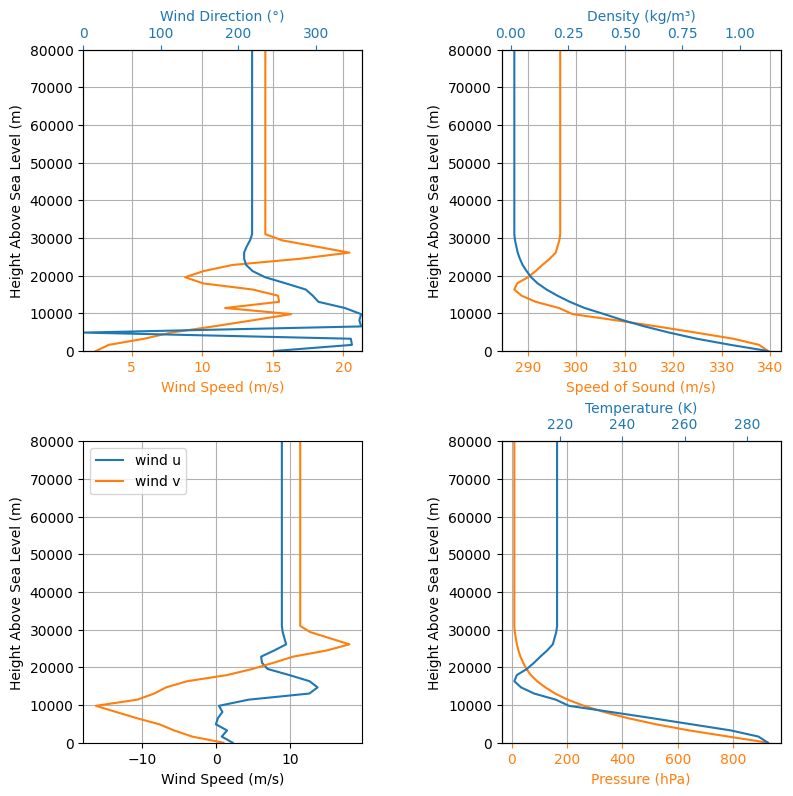

In [16]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime
import pandas as pd
# Launch site
# FAR
# Latitude: 35.3466 N
# Longitude: -117.809 W
# Altitude: 2000 ft

site_lat = 35.3466
site_lon = -117.809 
site_alt = 2000 #ft

launch_date = [2026,1,18,8,0,0]
timeadj = -4

# env = Environment(latitude=site_lat, longitude=site_lon, elevation=site_alt,date=(2026, 1, 18, 8), # year, month, day, hour
# timezone="US/Pacific")

# env.set_atmospheric_model(type="Forecast", file="GFS")

# env.info()


# Load the .csv file into the environment
df = pd.read_csv('vertical_profile_2026-01-15_14PST copy.csv')
#df = pd.read_csv('atmodata.csv')

print(df)

# Create Function objects to represent the profiles
env = Environment(latitude=site_lat, longitude=site_lon)

pressure_func = list(zip(df['height'], df['pressure']))

print(pressure_func)

wind_u_func = list(zip(df['height'], df['wind_u']))
wind_v_func = list(zip(df['height'], df['wind_v']))

print(wind_u_func)
print(wind_v_func)

temperature_func = list(zip(df['height'], df['temperature']))

print(temperature_func)

# Set up the environment

env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=pressure_func,
    temperature=temperature_func,
    wind_u=wind_u_func,
    wind_v=wind_v_func,
)

env.plots.atmospheric_model()


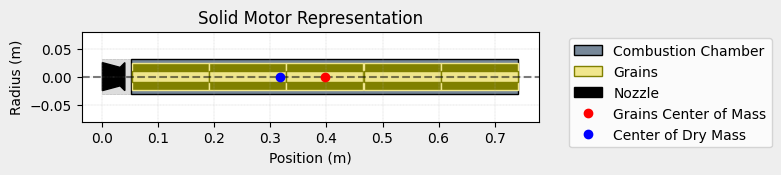

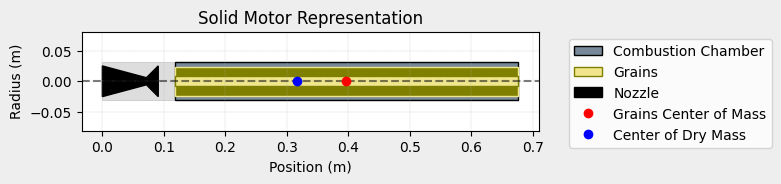

Nozzle Details
Nozzle Radius: 0.025 m
Nozzle Throat Radius: 0.00577 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.001 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.0238 m
Grain Inner Radius: 0.008 m
Grain Height: 0.558 m
Grain Volume: 0.001 m3
Grain Mass: 1.599 kg

Motor Details
Total Burning Time: 3.06 s
Total Propellant Mass: 1.599 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2076.139 m/s
Average Thrust: 1084.626 N
Maximum Thrust: 1604.3506 N at 2.56 s after ignition.
Total Impulse: 3318.955 Ns



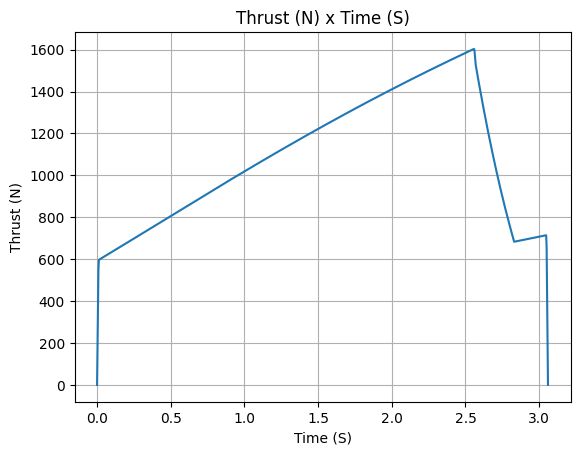

In [17]:

BoosterMotor = SolidMotor(
thrust_source="./L1553chasebismuth.eng",
dry_mass=0, #kg
dry_inertia=(0.125, 0.125, 0.002), #moi ,kg/m^2
nozzle_radius=25 / 1000, #m
grain_number=5, #m
grain_density=1815, #kg/m^3
grain_outer_radius=23.81 / 1000, #m
grain_initial_inner_radius= 10.16 / 1000, #m
grain_initial_height=137 / 1000, #m
grain_separation=1 / 1000, #m 
grains_center_of_mass_position=0.397, #m
center_of_dry_mass_position=0.317, #m
nozzle_position=0, #m
#burn_time=2.1, #s
throat_radius=16.5 / 1000,#m
coordinate_system_orientation="nozzle_to_combustion_chamber"
)
BoosterMotor.draw()
#BoosterMotor.info()

SustainerMotor = SolidMotor(
thrust_source="./L1081SomeKindaPropellent.eng",
dry_mass=0, #kg
dry_inertia=(0.125, 0.125, 0.002), #moi ,kg/m^2
nozzle_radius=25 / 1000, #m
grain_number=1, #m
grain_density=1815, #kg/m^3
grain_outer_radius=23.8 / 1000, #m
grain_initial_inner_radius= 8 / 1000, #m
grain_initial_height=558 / 1000, #m
grain_separation=1 / 1000, #m 
grains_center_of_mass_position=0.397, #m
center_of_dry_mass_position=0.317, #m
nozzle_position=0, #m
#burn_time=3.5, #s
throat_radius=5.77 / 1000,#m
coordinate_system_orientation="nozzle_to_combustion_chamber",

)
SustainerMotor.draw()
SustainerMotor.info()
#SustainerMotor.info()


0.2917155456
0.0182322216


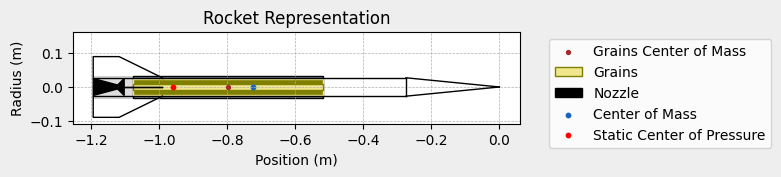

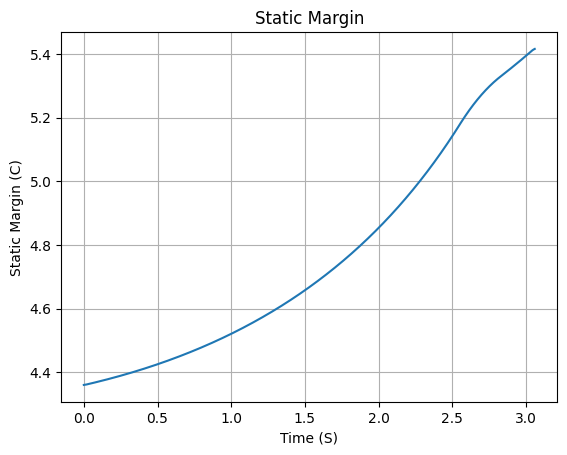

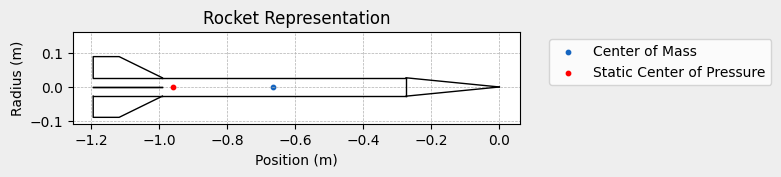

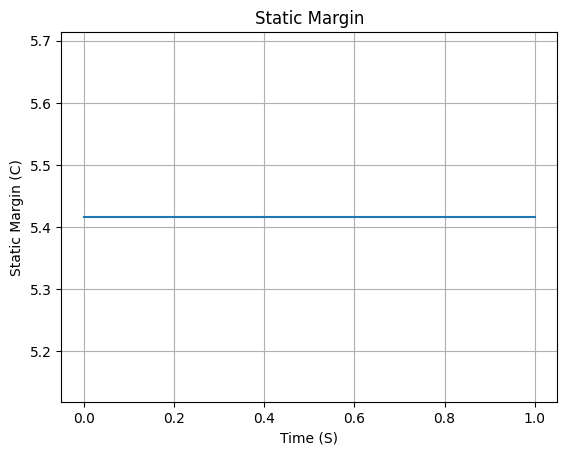

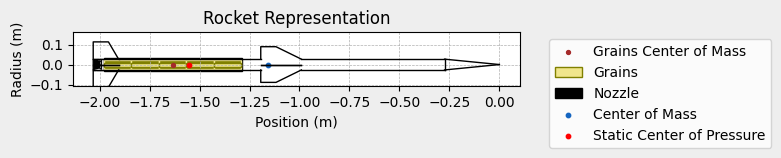

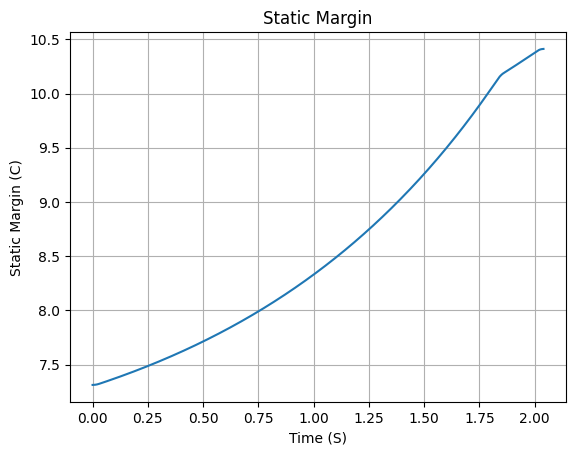

In [18]:
RelapseSustainer = Rocket(
    radius=54 / 2000,
    mass=2.05,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./CD Power OFF Sustainer Only.csv",
    power_on_drag="./CD Power ON Sustainer only.csv",
    center_of_mass_without_motor=-0.66675,
    coordinate_system_orientation="tail_to_nose"
    )
RelapseSustainer.add_motor(SustainerMotor, position=-1.1938)

sustainernose_cone = RelapseSustainer.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainerfin_set = RelapseSustainer.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)


cd = 1.8
diameter = 0.6096

area = (diameter/2)*(diameter/2)*3.14
print(area)

main = RelapseSustainer.add_parachute(
    name="main",
    cd_s=area*cd,
    trigger=800,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

cd = 0.7
diameter = 0.1524

area = (diameter/2)*(diameter/2)*3.14
print(area)

drogue = RelapseSustainer.add_parachute(
    name="drogue",
    cd_s=area,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

RelapseSustainer.draw()
RelapseSustainer.plots.static_margin()
#RelapseSustainer.all_info()

#------------------------------------------------

RelapseSustainerNOMOTOR = Rocket(
    radius=54 / 2000,
    mass=3.6,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./CD Power OFF Sustainer Only.csv",
    power_on_drag="./CD Power ON Sustainer only.csv",
    center_of_mass_without_motor=-0.66675,
    coordinate_system_orientation="tail_to_nose"
)

sustainernomotornose_cone = RelapseSustainerNOMOTOR.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainernomotorfinset = RelapseSustainerNOMOTOR.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)




RelapseSustainerNOMOTOR.draw()
RelapseSustainerNOMOTOR.plots.static_margin()
#RelapseSustainer.all_info()

#--------------------------------------

RelapseStack = Rocket(
    radius=54 / 2000,
    mass=5.162,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./FULL STACK CD Power OFF.csv",
    power_on_drag="./FULL STACK CD Power ON.csv",
    center_of_mass_without_motor=-0.9906,
    coordinate_system_orientation="tail_to_nose"
    )
RelapseStack.add_motor(BoosterMotor, position=-2.032)

stacknose_cone = RelapseStack.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainerstackfin_set = RelapseStack.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)

boosterfin_set = RelapseStack.add_trapezoidal_fins(
    n=4,
    root_chord=0.127,
    tip_chord=0.0762,
    span=0.08636,
    position=-1.905,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)

RelapseStack.draw()
RelapseStack.plots.static_margin()
#RelapseStack.all_info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.707 | e1: 0.012 | e2: 0.012 | e3: -0.707
Euler Angles - Spin φ : 0.00° | Nutation θ: -2.00° | Precession ψ: -270.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 4.361 c


Surface Wind Conditions

Frontal Surface Wind Speed: -2.24 m/s
Lateral Surface Wind Speed: -1.00 m/s


Launch Rail

Launch Rail Length: 3.048 m
Launch Rail Inclination: 88.00°
Launch Rail Heading: 270.00°


Rail Departure State

Rail Departure Time: 0.200 s
Rail Departure Velocity: 32.211 m/s
Rail Departure Stability Margin: 4.385 c
Rail Departure Angle of Attack: 4.337°
Rail Departure Thrust-Weight Ratio: 19.236
Rail Departure Reynolds Number: 1.102e+05


Burn out State

Burn out time: 3.060 s
Altitude at burn out: 1362.715 m (ASL) | 1362.715 m (AGL)
Rocket speed at burn out: 994.563 m/s
Freestrea

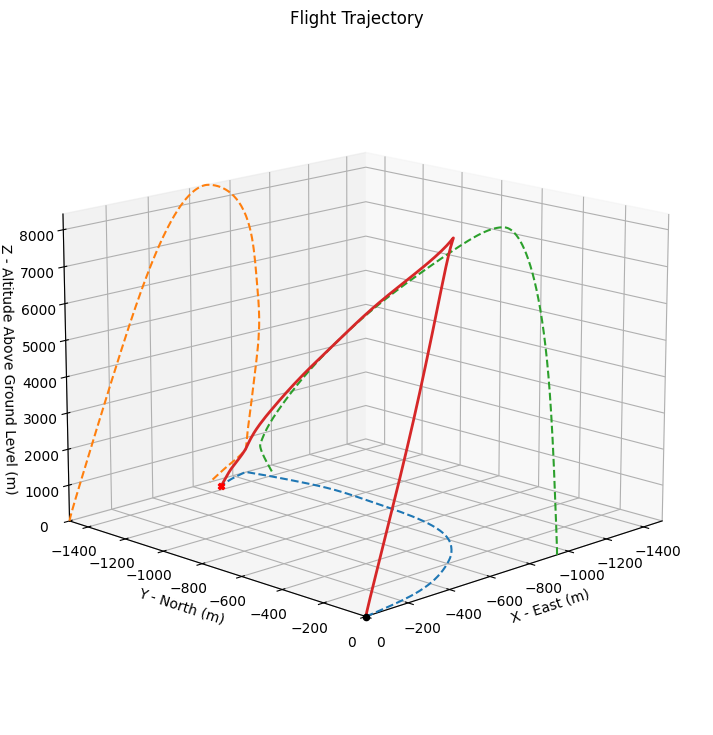

In [19]:
test_flight = Flight(
    rocket=RelapseSustainer, environment=env, rail_length=3.048, inclination=88, heading=270
    )

# test_flight.prints.initial_conditions()
# test_flight.prints.surface_wind_conditions()
test_flight.info()
test_flight.plots.trajectory_3d()


Initial Conditions

Initial time: 10.040 s
Position - x: -165.77 m | y: -49.32 m | z: 2955.20 m
Velocity - Vx: -14.93 m/s | Vy: -5.25 m/s | Vz: 222.04 m/s
Attitude (quaternions) - e0: -0.540 | e1: -0.030 | e2: 0.020 | e3: 0.841
Euler Angles - Spin φ : 155.70° | Nutation θ: -4.17° | Precession ψ: 89.69°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.72 rad/s
Initial Stability Margin: 5.487 c


Surface Wind Conditions

Frontal Surface Wind Speed: 2.30 m/s
Lateral Surface Wind Speed: 0.83 m/s


Launch Rail

Launch Rail Length: 0.01 m
Launch Rail Inclination: 85.83°
Launch Rail Heading: 85.92°


Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Stability Margin: 0.000 c
Rail Departure Angle of Attack: 0.022°
Rail Departure Thrust-Weight Ratio: 0.000
Rail Departure Reynolds Number: 0.000e+00


Burn out State

Burn out time: 3.060 s
Altitude at burn out: 2955.202 m (ASL) | 2955.202 m (AGL)
Rocket speed at burn out: 0.000 m/s
Fre

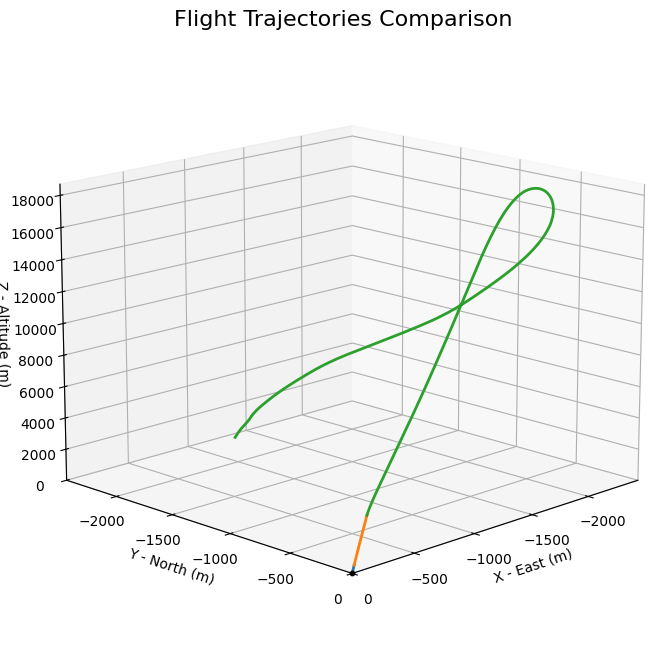

In [20]:
from rocketpy.plots.compare import CompareFlights
flights = []

StackFlight = Flight(
    rocket=RelapseStack, 
    environment=env, 
    rail_length=3.048, 
    inclination=89, 
    heading=270,
    max_time = BoosterMotor.burn_out_time
    )


#StackFlight.info()
#StackFlight.plots.trajectory_3d()
flights.append(StackFlight)

stagingdelay = 8

SustainerNOMOTORFlight = Flight(
    rocket=RelapseSustainerNOMOTOR, 
    environment=env, 
    initial_solution=StackFlight,
    rail_length=0.01, 
    inclination=StackFlight.attitude_angle(BoosterMotor.burn_out_time-0.01), 
    heading=StackFlight.path_angle(BoosterMotor.burn_out_time-0.01),
    max_time = stagingdelay+BoosterMotor.burn_out_time
)

flights.append(SustainerNOMOTORFlight)

sustainerstartcondition = SustainerNOMOTORFlight.solution[-2][:]
sustainerstartcondition[0] = 0

SustainerFlight = Flight(
    rocket=RelapseSustainer, 
    environment=env, 
    initial_solution=sustainerstartcondition,
    rail_length=0.01, 
    inclination=SustainerNOMOTORFlight.attitude_angle(stagingdelay+BoosterMotor.burn_out_time-0.01), 
    heading=SustainerNOMOTORFlight.path_angle(stagingdelay+BoosterMotor.burn_out_time-0.01),
    #max_time = 15
)
for entry in SustainerFlight.solution:
    entry[0] = entry[0]+stagingdelay+BoosterMotor.burn_out_time

flights.append(SustainerFlight)



comparison = CompareFlights(flights)
SustainerFlight.info()
comparison.trajectories_3d()
#comparison.velocities()
#comparison.accelerations()


In [21]:
from rocketpy.simulation import FlightDataExporter

FlightDataExporter(SustainerFlight).export_kml(
    file_name="trajectory.kml",
    extrude=True,
    altitude_mode="relativetoground",
)

File  trajectory.kml  saved with success!


In [22]:
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticFlight,
    StochasticNoseCone,
    StochasticParachute,
    StochasticRailButtons,
    StochasticRocket,
    StochasticSolidMotor,
    StochasticTail,
    StochasticTrapezoidalFins,
)
from rocketpy import MonteCarlo

stochastic_env = StochasticEnvironment(
    environment=env,
    #ensemble_member=list(range(env.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

stochastic_Boostermotor = StochasticSolidMotor(
    solid_motor=BoosterMotor,
    burn_start_time=(0, 0.1),
    total_impulse=(BoosterMotor.total_impulse, 1),
)

stochastic_Boostermotor.visualize_attributes()

stochastic_Sustainermotor = StochasticSolidMotor(
    solid_motor=SustainerMotor,
    burn_start_time=(0, 0.1),
    total_impulse=(SustainerMotor.total_impulse, 1),
)

stochastic_Sustainermotor.visualize_attributes()

stochasticSustainer = StochasticRocket(
    rocket=RelapseSustainer,
    #radius=0.0127 / 2000,
    mass=(2.05, 0.1, "normal"),
    inertia_11=(6.321, 0),
    inertia_22=0.01,
    inertia_33=0.01,
    center_of_mass_without_motor=0,
)
stochasticSustainer.add_motor(stochastic_Sustainermotor, position=0.001)

stochastic_nose_cone = StochasticNoseCone(
    nosecone=sustainernose_cone,
    # length=0.001,
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins= sustainerfin_set,
    # root_chord=0.0005,
    # tip_chord=0.0005,
    # span=0.0005,
)


stochastic_main = StochasticParachute(
    parachute=main,
    cd_s=main.cd_s,
    lag=0.1,
)

stochastic_drogue = StochasticParachute(
    parachute=drogue,
    cd_s=drogue.cd_s,
    lag=0.2,
)

stochasticSustainer.add_nose(stochastic_nose_cone, position=(1.134, 0.001))
stochasticSustainer.add_trapezoidal_fins(stochastic_fin_set)

stochasticSustainer.add_parachute(stochastic_main)
stochasticSustainer.add_parachute(stochastic_drogue)


stochasticSustainer.visualize_attributes()

print("\n\n")
print(stochasticSustainer.aerodynamic_surfaces)

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                0.0
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 35.3466
	longitude                -117.809
	timezone                 None

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)
Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    2.04
	center_of_dry_mass_position      0.317
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0.125
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0.125
	dry_I_23                         0
	dry_I_33                         0.002
	dry_mass                         0
	grain_density                    1815
	gra

In [23]:
# stochastic_flight = StochasticFlight(
#     flight=test_flight,
#     inclination= (89, 3),  # mean= 84.7, std=1
#     heading=(270, 20),  # mean= 53, std=2
# )
# #stochastic_flight.visualize_attributes()

# test_dispersion = MonteCarlo(
#     filename="./montecarlosettings",
#     environment=stochastic_env,
#     rocket=stochasticSustainer,
#     flight=stochastic_flight,
# )


# test_dispersion.simulate(
#     number_of_simulations=10,
#     append=False,
#     include_function_data=False,
#     parallel=True,
#     n_workers=10,
# )

# #test_dispersion.prints.all()
# test_dispersion.all_info()

In [25]:
from rocketpy.plots.compare import CompareFlights
import numpy as np
#monte carlo attempts
#just gonna vary launch angle for now

railinclination = [88,4]
flightnum = 1
thisflightnum = 0

flights = []


# while thisflightnum < flightnum:

StackFlight2 = Flight(
    rocket=RelapseStack, 
    environment=env, 
    rail_length=3.048, 
    inclination=railinclination[0]+np.random.normal(railinclination[0],railinclination[1]), 
    heading=270,
    max_time = BoosterMotor.burn_out_time
    )

#StackFlight2.info()
#StackFlight2.plots.trajectory_3d()
flights.append(StackFlight2)

stagingdelay = 8

SustainerNOMOTORFlight2 = Flight(
    rocket=RelapseSustainerNOMOTOR, 
    environment=env, 
    initial_solution=StackFlight2,
    rail_length=0.01, 
    inclination=StackFlight2.attitude_angle(BoosterMotor.burn_out_time-0.01), 
    heading=StackFlight2.path_angle(BoosterMotor.burn_out_time-0.01),
    max_time = stagingdelay+BoosterMotor.burn_out_time
)

flights.append(SustainerNOMOTORFlight2)

sustainerstartcondition = SustainerNOMOTORFlight2.solution[-2][:]
sustainerstartcondition[0] = 0

SustainerFlight2 = Flight(
    rocket=RelapseSustainer, 
    environment=env, 
    initial_solution=sustainerstartcondition,
    rail_length=0.01, 
    inclination=SustainerNOMOTORFlight2.attitude_angle(stagingdelay+BoosterMotor.burn_out_time-0.01), 
    heading=SustainerNOMOTORFlight2.path_angle(stagingdelay+BoosterMotor.burn_out_time-0.01),
    #max_time = 15
)
for entry in SustainerFlight2.solution:
    entry[0] = entry[0]+stagingdelay+BoosterMotor.burn_out_time

flights.append(SustainerFlight2)
thisflightnum = thisflightnum + 1 



comparison = CompareFlights(flights)
#SustainerFlight2.info()
comparison.trajectories_3d()

c:\Users\E\Documents\GitHub\Procyon\rocketpy\.venv\Lib\site-packages\rocketpy\mathutils\function.py:2239: RuntimeWarning: divide by zero encountered in divide
  vector_b.extend(3 * ((y[2:] - y[1:-1]) / h[1:] - (y[1:-1] - y[:-2]) / h[:-1]))


ValueError: array must not contain infs or NaNs